In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization
import keras
import shutil
import os

In [2]:
x = []
y = []
datadir = r'/kaggle/input/flowers/flowers'
Categories = []
for file_label in os.listdir(datadir):
    Categories.append(file_label)
    for file_name in os.listdir(datadir+'/'+file_label):
        x.append(datadir+'/'+file_label+'/'+file_name)
        y.append(file_label)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=34)

In [4]:
print("x_train = ",len(x_train))
print("x_test = ",len(x_test))

x_train =  12592
x_test =  3148


In [5]:
os.mkdir('/kaggle/working/train')
os.mkdir('/kaggle/working/test')

In [6]:
datadir = r'/kaggle/working/'
for file_label in Categories:
    os.mkdir('/kaggle/working/train/'+file_label)
    new='/kaggle/working/train/'+file_label
    for file_name in x_train :
        if(file_name.find(file_label) != -1 ):
            shutil.copy2(file_name, new)


In [7]:
for file_label in Categories:
    os.mkdir('/kaggle/working/test/'+file_label)
    new='/kaggle/working/test/'+file_label
    for file_name in x_test :
        if(file_name.find(file_label))>0:
            shutil.copy2(file_name, new)


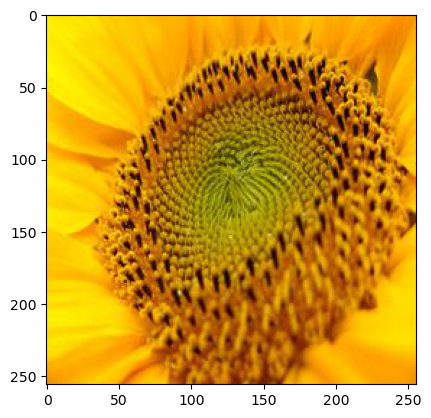

In [8]:
image = load_img(x_train[54])
plt.imshow(image)

In [9]:
image.size

(256, 256)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(
    '/kaggle/working/train', 
    color_mode="rgb",
    target_size=(227,227),
    batch_size=25,
    class_mode='categorical'
)

Found 12592 images belonging to 16 classes.


In [12]:
test_set = test_datagen.flow_from_directory(
    '/kaggle/working/test', 
    color_mode="rgb",
    target_size=(227,227),
    batch_size=10,
    class_mode='categorical'
)

Found 3148 images belonging to 16 classes.


In [13]:

model = Sequential()
model.add(Conv2D(96, kernel_size=(11,11), strides= 4,padding= 'valid', activation= 'relu',input_shape= (227,227,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),padding= 'valid'))

model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2)))

model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu'))
model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu'))  

model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid'))
model.add(Dropout(0.5))         
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(16, activation='softmax')) # 16 because we have 16 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    mode='max'
)
res = model.fit(training_set,
          epochs = 64,
          callbacks=[custom_early_stopping],
          validation_data = test_set)

Epoch 1/64


2023-04-09 10:06:49.922638: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


504/504 [==============================] - 50s 80ms/step - loss: 2.7925 - accuracy: 0.0596 - val_loss: 2.7686 - val_accuracy: 0.0702
Epoch 2/64
504/504 [==============================] - 41s 81ms/step - loss: 2.7704 - accuracy: 0.0646 - val_loss: 2.7687 - val_accuracy: 0.0613
Epoch 3/64
504/504 [==============================] - 41s 82ms/step - loss: 2.7701 - accuracy: 0.0659 - val_loss: 2.7694 - val_accuracy: 0.0689
Epoch 4/64
504/504 [==============================] - 39s 78ms/step - loss: 2.7703 - accuracy: 0.0662 - val_loss: 2.7693 - val_accuracy: 0.0613
Epoch 5/64
504/504 [==============================] - 41s 81ms/step - loss: 2.7700 - accuracy: 0.0644 - val_loss: 2.7692 - val_accuracy: 0.0613
Epoch 6/64
504/504 [==============================] - 41s 82ms/step - loss: 2.7700 - accuracy: 0.0662 - val_loss: 2.7693 - val_accuracy: 0.0613


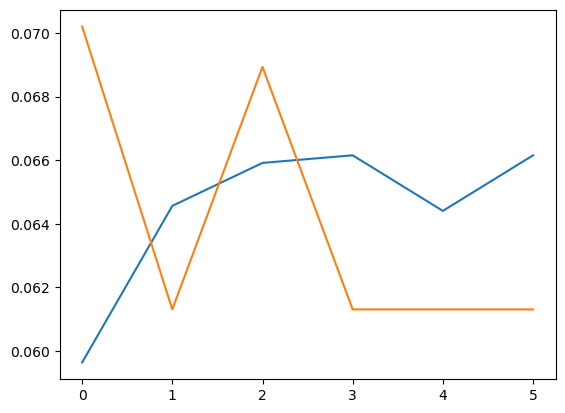

In [15]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])

In [16]:
model.evaluate(test_set)

315/315 [==============================] - 8s 26ms/step - loss: 2.7693 - accuracy: 0.0613


[2.769268274307251, 0.06130876764655113]

In [17]:
predict=model.predict(test_set)
predict=np.argmax(predict,axis = 1)
from sklearn.metrics import accuracy_score
Acc = accuracy_score(test_set.classes,predict)
print("Accuracy = ", Acc)

315/315 [==============================] - 7s 23ms/step
Accuracy =  0.06130876747141042
